In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

As a teaser, here is the plot we’re gonna try building:

<div style="max-width:95%">
<img src="https://www.economist.com/img/b/1000/591/90/sites/default/files/images/2021/08/articles/main/20210828_woc034.png">
</div> 

Let's get started by creating the objects that are going to hold the data for us. Note these values are inferred from the original plot and not something we computed from the original data source.

In [2]:
counts = [6, 7, 7, 9, 11, 15, 17, 18, 54]
names = [
    "Hantavirus", "Tularemia", "Dengue", "Ebola", "E. coli", 
    "Tuberculosis", "Salmonella", "Vaccinia", "Brucella"
]

# The positions for the bars
# This allows us to determine exactly where each bar is located
y = [i * 0.9 for i in range(len(names))]

In [3]:
# The colors
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

## Basic barchart

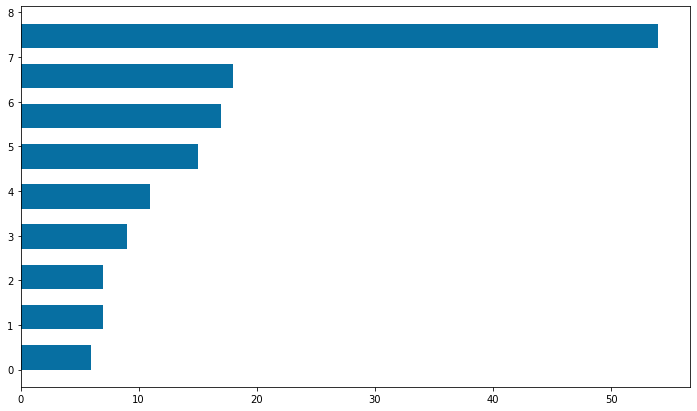

In [4]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.barh(y, counts, height=0.55, align="edge", color=BLUE);

## Customize layout

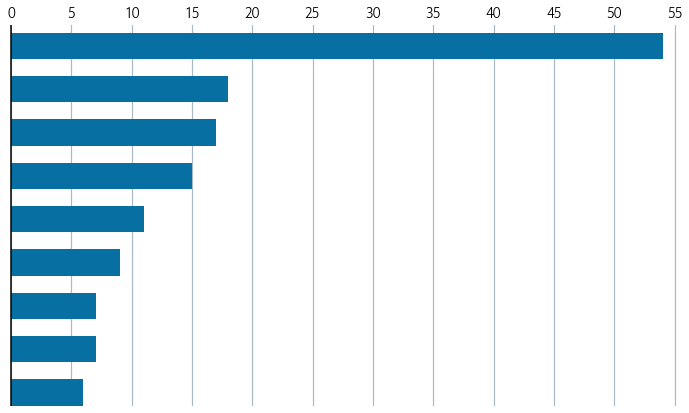

In [5]:
ax.xaxis.set_ticks([i * 5 for i in range(0, 12)])
ax.xaxis.set_ticklabels([i * 5 for i in range(0, 12)], size=16, fontfamily="Econ Sans Cnd", fontweight=100)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

ax.set_xlim((0, 55.5))
ax.set_ylim((0, len(names) * 0.9 - 0.2))

# Set whether axis ticks and gridlines are above or below most artists.
ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")

# Hide y labels
ax.yaxis.set_visible(False)

fig

## Add labels

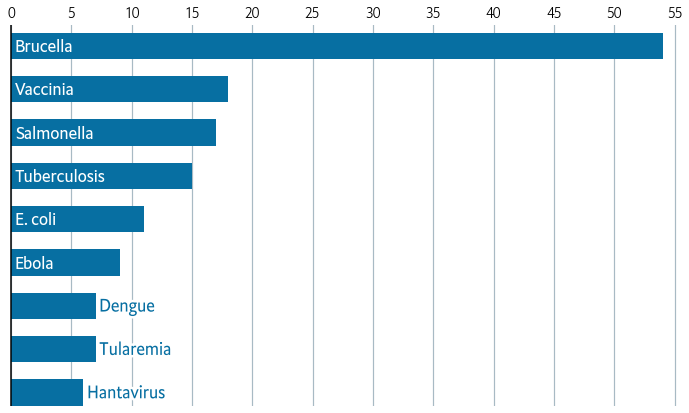

In [6]:
PAD = 0.3
for name, count, y_pos in zip(names, counts, y):
    x = 0
    color = "white"
    path_effects = None
    if count < 8:
        x = count
        color = BLUE    
        path_effects=[withStroke(linewidth=5, foreground="white")]
    
    ax.text(
        x + PAD, y_pos + 0.5 / 2, name, 
        color=color, fontfamily="Econ Sans Cnd", fontsize=18, va="center",
        path_effects=path_effects
    ) 
fig   

## Add annotations and some final touches

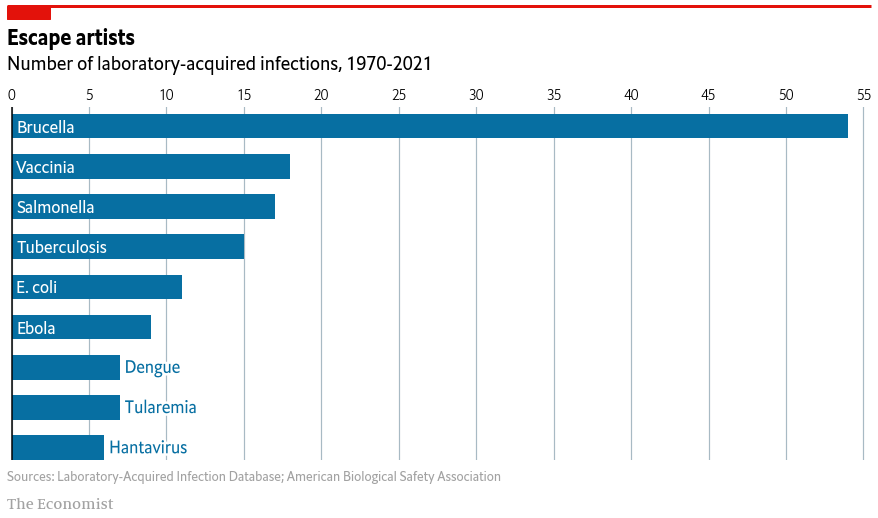

In [7]:
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

fig.text(
    0, 0.925, "Escape artists", 
    fontsize=22, fontweight="bold", fontfamily="Econ Sans Cnd"
)
fig.text(
    0, 0.875, "Number of laboratory-acquired infections, 1970-2021", 
    fontsize=20, fontfamily="Econ Sans Cnd"
)

source = "Sources: Laboratory-Acquired Infection Database; American Biological Safety Association"
fig.text(
    0, 0.06, source, color=GREY, 
    fontsize=14, fontfamily="Econ Sans Cnd"
)
fig.text(
    0, 0.005, "The Economist", color=GREY,
    fontsize=16, fontfamily="Milo TE W01"
)

fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

fig.set_facecolor("white")
#fig.savefig("plot.png", dpi=300)
fig